# Model Training

In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [4]:
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Preparing X and Y variables

In [5]:
X = df.drop(columns=['output'],axis=1)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y = df['output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

## Feature Transformation

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Apply standardization

pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)  # Apply PCA



## Feature Selection

In [12]:

# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [13]:
# Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3491
- Mean Absolute Error: 0.2840
- R2 Score: 0.5078
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3410
- Mean Absolute Error: 0.2668
- R2 Score: 0.5338


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4590
- Mean Absolute Error: 0.4353
- R2 Score: 0.1491
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4339
- Mean Absolute Error: 0.4082
- R2 Score: 0.2450


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3491
- Mean Absolute Error: 0.2842
- R2 Score: 0.5077
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3405
- Mean Absolute Error: 0.2663
- R2 Score: 0.5351


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.4080
- Mean Absolute Error: 0.3430
- R2 Score: 0.3276
-----------------------

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.535146
0,Linear Regression,0.533789
5,Random Forest Regressor,0.504592
6,XGBRegressor,0.443034
7,AdaBoost Regressor,0.376029
1,Lasso,0.245043
4,Decision Tree,0.211207
3,K-Neighbors Regressor,0.177026


### Ridge regression

In [20]:
# Initialize the Ridge regression model
ridge_model = Ridge()

# Fit the model using the training data
ridge_model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = ridge_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Model Evaluation:")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")
print("Accuracy of the model is %.2f" %r2)

Ridge Regression Model Evaluation:
Root Mean Squared Error: 0.3405
Mean Absolute Error: 0.2663
R2 Score: 0.5351
Accuracy of the model is 0.54


### Plot y_pred and y_test

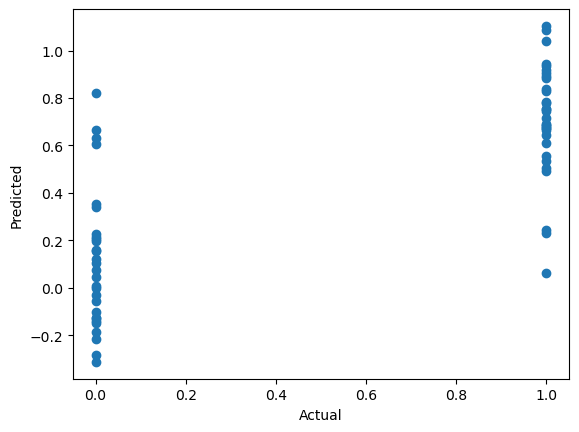

In [21]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

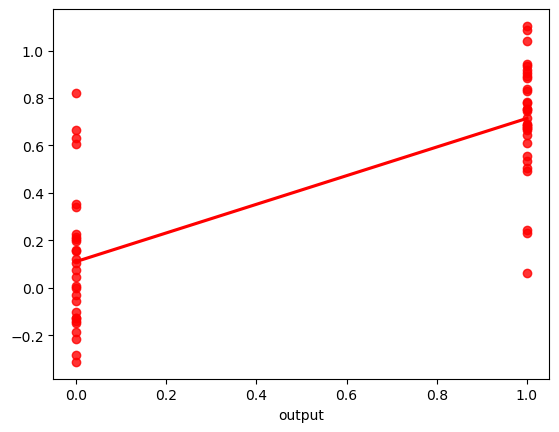

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values

In [24]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# DataFrame
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})

# Display the DataFrame
print(pred_df)

     Actual Value  Predicted Value  Difference
179             0         0.207944   -0.207944
228             0         0.632780   -0.632780
111             1         0.717021    0.282979
246             0         0.046275   -0.046275
60              1         0.933542    0.066458
9               1         0.828070    0.171930
119             1         0.554142    0.445858
223             0        -0.311528    0.311528
268             0        -0.125006    0.125006
33              1         0.505724    0.494276
5               1         0.673183    0.326817
101             1         0.229665    0.770335
45              1         0.836206    0.163794
175             0         0.103146   -0.103146
118             1         1.103577   -0.103577
46              1         0.904976    0.095024
125             1         1.084936   -0.084936
192             0         0.212543   -0.212543
285             0        -0.138880    0.138880
279             0        -0.028108    0.028108
152          